# Módulo 5 Actividad 4

### Intención del aprendizaje esperado:


4. Elaborar un modelo predictivo aplicando el algoritmo de Regresión Logística para resolver un problema de clasificación utilizando el lenguaje Python.


### Ejercicios Planteados


*El archivo diabetes.csv proviene del Instituto Nacional de Enfermedades Diabetológicas, Digestivas y Nefrológicas de los Estados Unidos. El objetivo de la base de datos es predecir si un paciente tiene o no diabetes, en base a ciertas mediciones diagnósticas incluidas en el conjunto de datos. Este es un subconjunto de una base de datos mucho más grande. Aquí se han seleccionado solo mujeres con edad mayor o igual a 21, descendientes del pueblo indígena Pima.*



**Las variables disponibles son las siguientes:**


- Pregnancies: número de veces embarazada.

- Glucose: concentración de glucosa en plasma 2 horas en una prueba de tolerancia a la glucosa oral.

- BoodPressure: presión arterial diastólica (mm Hg).

- SkinThickness: espesor de pliegue de la piel de los tríceps (mm).

- Insulin: insulina sérica de 2 horas (MU u/ml).

- BMI: índice de masa corporal (peso en kg/(altura en m)^2).

- DiabetesPedigreeFunction: Función de pedigrí de diabetes (DPF). Cálculo de una probabilidad de diabetes en función de la edad y de la historia diabética familiar.

- Age: edad en años.

- Outcome: variable categórica que indica si tiene un paciente tiene diabetes o no tiene diabetes.


**Requerimientos:**

1. Cargue los datos y muestre los primeros 6 registros. Identifique qué variable(s) es(son) numérica(s) y qué variable(s) es(son) categórica(s).

In [1]:
import pandas as pd

diabetes = pd.read_csv('diabetes.csv')
df_diabetes = pd.DataFrame(diabetes)

df_diabetes.head(6)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


*La única variable categórica es "outcome" que refiere a si un paciente está categorizado como diabético o no.  Todas las demás variables son numéricas.*

2. Separe el conjunto de datos en un conjunto de variables predictoras y otro con la variable respuesta.
3. A partir de lo anterior, genere conjuntos de datos de entrenamiento y de prueba, separando un 25% de los datos para fines de prueba.
4. Cree un modelo de Regresión Logística (con una semilla igual a 10 para fines de replicabilidad) y ajuste el modelo a los datos de entrenamiento. En este punto es posible que tenga problemas de convergencia del algoritmo. Si es así, intente incrementar el número de iteraciones del algoritmo (max_iter) o probar con un solucionador distinto (solver).
5. Genere predicciones con los datos de las variables predictoras del conjunto de datos de prueba.


In [2]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression

X = df_diabetes.drop('Outcome', axis = 1)
y = df_diabetes['Outcome']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25, random_state = 110)

modelo_regresion_logistica = LogisticRegression(random_state = 10, max_iter = 500, solver = 'lbfgs')
modelo_regresion_logistica.fit(X_train, y_train)

y_pred = modelo_regresion_logistica.predict(X_test)

#accuracy = modelo_regresion_logistica.score(X_test, y_test)
#accuracy


6. Muestre la matriz de confusión como un objeto numpy.ndarray.

In [3]:
import numpy as np
from sklearn.metrics import confusion_matrix

matriz_de_confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión: \n", matriz_de_confusion)

Matriz de Confusión: 
 [[119  13]
 [ 21  39]]


7. Grafique la matriz de confusión usando un mapa de calor (Heatmap).

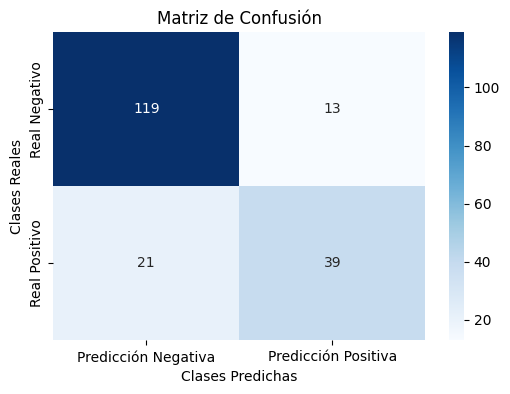

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Crear el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_de_confusion, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicción Negativa', 'Predicción Positiva'], 
            yticklabels=['Real Negativo', 'Real Positivo'])
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Reales')
plt.title('Matriz de Confusión')
plt.show()


8. Genere las métricas de evaluación a este problema de clasificación. Comente los resultados.